# _Python for Scientific Data Analysis_

# NumPy

## Section 1: NumPy Arrays



**_NumPy_**, short for "Numerical Python", is one of the most important foundational packages
for numerical computing in Python as McKinney says.  In fact, it is so fundamental that it is very hard to do scientific Python without it.  Even other workhorse packages that we will hear about -- e.g. Matplotlib, SciPy -- require it for their installation.   

NumPy has some key powerful tools:

* _ndarray_ - technically, native Python can support arrays but NumPy arrays are much faster.  I.e. they allow fast fast array-oriented arithmetic operations and flexible broadcasting capabilities.
*  Vectorized mathematical functions for fast operations on entire data arrays, obviating the need for loops. 
*  Tools for reading/writing array data to disk and working with memory-mapped
files.
* Powerful linear algebra, random number generation, and Fourier transform capabilities.
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.  NumPy uses very fast C code under-the-hood.   

McKinney gives a whole list of other things about why NumPy is so great (which it is).   Now, NumPy doesn't do _everything_ and there are other complementary packages that perform comparable tasks (esp. SciPy).  And it doesn't really have built-in modeling capabilities like SciPy does.  But MANY libraries depend on NumPy.  So for Scientific Python, you need to know and master NumPy.

As mentioned before, to utilize NumPy's capabilities you need to import the library first.  The standard is:

```
import numpy as np
```

Then different NumPy operations are simple: ``np.[do_something]``.

### Basics of NumPy Arrays


#### _Simple Array Examples_ 


The core of NumPy is the N-dimensional array object ("ndarray").   Or just an "**_array_**" (since NumPy arrays are far better than native Python arrays).

Here is a simple example of a NumPy array that we hard-code

In [3]:

import numpy as np

test_array=np.array([3,4,5,6])
print(test_array)
#[3 4 5 6]
test_array
#array([ 3,4,5,6])


[3 4 5 6]


array([3, 4, 5, 6])

And a simple example of a NumPy array that we compute:

In [4]:
import numpy as np


#generate random numbers from a normal distribution with a mean = 0 and variance = 1
#the (3,2) controls the dimensionality of the array: 3x2 . we will get to this later
test_array2 = np.random.randn(3,2)

test_array2

#some set of random numbers


array([[-0.25877436,  0.7300098 ],
       [-0.33571337, -0.70533836],
       [-1.27100836, -0.92546626]])

Now, we can do different operations with this array.  The simplest is arithmetic:

In [5]:

test_array2mult=test_array2*8
#this does an element-wise computation

test_array2mult

#some set of random numbers*8

array([[ -2.07019489,   5.84007844],
       [ -2.68570696,  -5.64270684],
       [-10.16806691,  -7.40373004]])

Here, the multiplication by 8 is applied element-wise to the array ``test_array2``.   


Note that the multiplication is a _vectorized_ multiplication, equivalent to the following in a C/Fortran-like nested loop:

In [13]:

test_array2mult=test_array2 #initialize data2, note: we will do this in a different way later

#note: we will worry about the shape attribute later
for i in range(test_array2.shape[0]):   
 for j in range(test_array2.shape[1]):
  test_array2mult[i,j]=test_array2[i,j]*8
  
test_array2mult


print(test_array2.shape)
print(test_array2mult.shape)
print(len(test_array2mult))

(3, 2)
(3, 2)
3


#### _Key Array Attributes_ 

A NumPy array will have a lot of different attributes.   But two key ones to keep in mind are:  ``.shape`` and ``.dtype``.   

1. ``.shape`` --  refers to the dimensionality of the array.   So for ``test_array`` in our example above, ``test_array.shape`` yields ``(4,)``.  That is, Python thinks that ``test_array`` is a one-dimensional array of length 4.  In this case, in fact, ``len(test_array)`` and ``test_array.shape`` give the same answer!
   

In [14]:
print(len(test_array))
print(test_array.shape)


4
(4,)


 As is obvious, ``test_array2`` is NOT a 1D array.   But it is a 3x2 array (e.g. like a matrix).   Unsurpisingly, ``test_array2.shape`` yields ``(3, 2)``.   Similarly, the output array ``test_array2mult`` has the same dimensions.
 

In [15]:
test_array2.shape

(3, 2)

 
2.  ``.dtype`` -- refers to the type of data stored in the array.  NumPy arrays -- unlike lists -- require a _fixed_ data type.   ``test_array`` looks like a bunch of integers, and ``test_array.dtype`` confirms: ``dtype('int64')``.  
 

  ``test_array2``, though, looks like a collection of not-integers (e.g. floating point entries) and it is ``test_array2.dtype`` yields ``dtype('float64')``. 
  

In [18]:
print(test_array.dtype)
print(test_array2.dtype)
test_array2.dtype

int64
float64


dtype('float64')


I.e. these are 64-bit floating numbers.   By default, Python stores these numbers as double-precision.   E.g. see this array:
  

In [ ]:
  a=np.array([np.e,np.pi])
  print(a[0])
  #2.718281828459045
  print(a[1])
  #3.141592653589793
  print('{0:.50f}'.format(a[0]))
  #2.71828182845904509079559829842764884233474731445312
  print('{0:.55f}'.format(a[0]))
  #2.7182818284590450907955982984276488423347473144531250000   #now we start to get zeros

  

 3.  ``.ndim`` -- refers to the number of dimensions (or axes) of an array. It is an attribute of a NumPy ndarray object. E.g. test_array2 has two dimensions and test_array has one.

In [36]:
print(test_array.ndim)
print(test_array2.ndim)

1
2


  Note that by default Python is _displaying_ 15 digits after the decimal point if you do not have a formatting prescribed.   For almost all cases, double-precision is good enough.  If you need more precision for whatever reason, 128 bit precision is the next step up, but this is beyond the scope of the course as its access seems platform specific.
  

### Creating NumPy Arrays From Lists and Tuples

The easiest way to create an array is to use the ``array`` function as we did in the two previous examples.  E.g. ``[something] = np.array[somethingelse]`` in simple form.    This function accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data.  


In the first example, we created a NumPy array out of a _list_  "[3,4,5,6]" (``np.array([3,4,5,6])``).  Essentially this is a type conversion.   We also could have done this: ``mylist=[3,4,5,6]; myarray=np.array(mylist)``.  

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
array:

In [20]:

mylist2=[[3,4,5],[6,7,8]]
myarray2=np.array(mylist2)
print(myarray2)
#array([[3, 4, 5],
#      [6, 7, 8]])
print(myarray2.shape)
#(2,3)


[[3 4 5]
 [6 7 8]]
(2, 3)


This also works for tuples:

In [21]:
mytuple=3,4,5,6,7,8
myarray3=np.array(mytuple)

print(myarray3)
#array([3, 4, 5, 6, 7, 8])
myarray3.shape

[3 4 5 6 7 8]


(6,)

In [22]:
mytuple2=(3,4,5),(6,7,8)
myarray3b=np.array(mytuple2)

print(myarray3b)
#array([[3, 4, 5],
#      [6, 7, 8]])
myarray3b.shape

[[3 4 5]
 [6 7 8]]


(2, 3)

#### _Altering Data Types in Arrays_
Note that the default type for arrays.  In the example above, it is 'int64' since all of the list entries are integers.  

In [23]:
print(myarray3b.dtype)
print(test_array2.dtype)

int64
float64


In the ``test_array2`` example above, it is 'float64' (i.e. double precision floating point).  Now we can convert the data type to something else.  

There are a couple of ways to do this.  First you define an array as ``yourarray=np.array([list],dtype = ['name of your data type'])``.  Another way is to use the ``astype`` attribute to make Python store your array in the datatype you want.

E.g.

In [24]:
a=np.array([np.e,np.pi])
print(a.dtype) #'float64'
print(a)

float64
[2.71828183 3.14159265]


In [25]:
b=a.astype('int64')
print(b.dtype)
print(b)

int64
[2 3]


In [26]:
a=np.array([np.e,np.pi],dtype='int64')
print(a.dtype) #'int64'
a #array([2 3]) #note the conversion from floating point to integer!


int64


array([2, 3])

In [27]:

a=np.array([np.e,np.pi])
b=np.array(a,dtype='float64')
c=a.astype('int64')
print(a.dtype,b.dtype,c.dtype)

a=(np.array([np.e,np.pi])).astype('float64')
print(a.dtype)

float64 float64 int64
float64


### Creating NumPy Arrays from Functions

Instead of only converting from lists/tuples, much like in other languages -- C, Fortran, IDL -- you can create arrays from nothing.  There are a couple of key functions for generating arrays, their shapes, and what they do as listed below (largely copied from a concatenation of Fuhrer, Sect 4.5 and McKinney Sect 4.1):

| Methods| Shape | Description |
| -------| ----------- | -------|
| array((n,m)) | (n,m) | convert input data to array; default is to copy
| asarray((n,m)) | (n,m) | convert to array; but do not copy if input is already an array
||  | |
| zeros((n,m)) | (n,m) | Matrix filled with zeros
| zeros_like(v) | (n,m) | Matrix filled with zeros whose dimensions (n,m) are equal to that of array _v_
| ones((n,m)) | (n,m) | Matrix filled with ones
| ones_like(v) | (n,m) | Matrix filled with ones whose dimensions (n,m) are equal to that of array _v_
| empty((n,m)) | (n,m) | Create new array by allocating memory but do not populate w/ any values
| empty_like(v) | (n,m) | zeros
| full((n,m),_q_ ) | (n,m) | Matrix filled with _q_
| ones_like(v) | (n,m) | Matrix filled with _q_ whose dimensions (n,m) are equal to that of array _v_
||  | |
| diag((v,k)) | (n,n) | (Sub-,super-)diagonal matrix along k-diagonal from vector _v_ with dimensions (n,n)
|eye(n,n), identity(n)| (n,n) | create square nxn identity matrix (1s on diagonal, 0s otherwise)
| random.rand(n,m) | (n,m) | Matrix filled with uniformly distributed random numbers between 0 and 1
||  | |
| arange(n) | (n,) | First n integers
| linspace(a,b,n) | (n,) | Vector with _n_ equispaced points between _a_ and _b_

These are important and a couple of operations are worth expanding on, with examples ...

#### General Array Creation Ex Nihilo
* np.zeros
* np.ones
* np.empty
* np.full
  

In [40]:
#np.zeros
a1=np.zeros((3,3) ) #creates an array of dimension (2,3) populated by zeros
print('a1')
print(a1)
print(a1.shape)
print(a1.ndim) #two dimensional
print('a1b')
a1b=np.zeros( (3,3,3) )
print(a1b)
print(a1b.shape)
print(a1b.ndim) #three dimensional

a1
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)
2
a1b
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
(3, 3, 3)
3


In [45]:
#np.ones
a1=np.ones((3,3) ) 
print('a1')
print(a1)
#all other properties will be similar to np.zeros

#np.empty
a2=np.empty((2,2) ) 
print('a2')
print(a2)

#np.full
a3=np.full( (3,3), 999)
print('a3')
print(a3)

a1
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
a2
[[0. 0.]
 [0. 0.]]
a3
[[999 999 999]
 [999 999 999]
 [999 999 999]]


#### np.arange and np.linspace

These are commonly used for generating arrays with some range of values.  

The syntax for ``np.arange`` is ``np.arange(start,stop,stepsize)``.  The default stepsize is 1.  ``start`` can be omitted, in which case ``arange`` will go from 0 to ``stop``.

The basic syntax for ``np.linspace`` is ``np.linspace(start,stop,number_of_bins``).  Note there are a couple of other optional keywords.  E.g. ``endpoint`` (default = True) means the stop value is included as the last sample (``endpoint=False`` excludes the stop value).  Also ``retstep = True`` (default = False) means that ``np.linspace`` actually returns a tuple of (samples, steps) (if set to False, it just returns samples).

Here are a few examples ...

In [56]:
#arange

cc=np.arange(5)
print(cc)  #[0 1 2 3 4]

cc=np.arange(0,5)
print(cc)  #[0 1 2 3 4]

cc=np.arange(1,5)
print(cc)  #[1 2 3 4]

cc=np.arange(7,14,2)
print(cc) #[ 7  9 11 13]

cc=np.arange(7,14,3)
print(cc) #[ 7 10 13]

#you don't have to have an integer step size
cc=np.arange(7,10,0.25)
print(cc) #[7.   7.25 7.5  7.75 8.   8.25 8.5  8.75 9.   9.25 9.5  9.75]

#or even integers at start,stop
cc=np.arange(7.3,10.5,0.25)
print(cc)

[0 1 2 3 4]
[0 1 2 3 4]
[1 2 3 4]
[ 7  9 11 13]
[ 7 10 13]
[7.   7.25 7.5  7.75 8.   8.25 8.5  8.75 9.   9.25 9.5  9.75]
[ 7.3   7.55  7.8   8.05  8.3   8.55  8.8   9.05  9.3   9.55  9.8  10.05
 10.3 ]


In [61]:
#linspace

dd=np.linspace(10,20,num=30)
#dd = np.linespace(10,20,30) #this is equivalent to the line above: i.e. the num= thing is optional in this case
print(dd)

#10.         10.34482759 10.68965517 11.03448276 11.37931034 11.72413793
# 12.06896552 12.4137931  12.75862069 13.10344828 13.44827586 13.79310345
# 14.13793103 14.48275862 14.82758621 15.17241379 15.51724138 15.86206897
# 16.20689655 16.55172414 16.89655172 17.24137931 17.5862069  17.93103448
# 18.27586207 18.62068966 18.96551724 19.31034483 19.65517241 20.        ]

dd=np.linspace(1,5,num=8,retstep=True)

print(dd[0]) #the samples
print(dd[1]) #the spacing

[10.         10.34482759 10.68965517 11.03448276 11.37931034 11.72413793
 12.06896552 12.4137931  12.75862069 13.10344828 13.44827586 13.79310345
 14.13793103 14.48275862 14.82758621 15.17241379 15.51724138 15.86206897
 16.20689655 16.55172414 16.89655172 17.24137931 17.5862069  17.93103448
 18.27586207 18.62068966 18.96551724 19.31034483 19.65517241 20.        ]
[1.         1.57142857 2.14285714 2.71428571 3.28571429 3.85714286
 4.42857143 5.        ]
0.5714285714285714


Note that as before, you can set the data type as a keyword.

E.g. 

In [68]:

a=np.full((50,50),np.pi)  #50 x50 matrix filled with pi
b=np.full((50,50),np.pi,dtype='int64') #50 x50 matrix filled with 3s due to a type conversion
c=np.full((50,50),np.pi,dtype='float64')  #50 x50 matrix filled with double precision
e=np.full((50,50),np.pi).astype('float64')
print(a.dtype,b.dtype,c.dtype,e.dtype)

f=np.linspace(1,5,num=8,dtype='float64')
print(f)
print(f.dtype)
f2=np.linspace(1,5,num=8,dtype='int64')
print(f2)
print(f2.dtype)

float64 int64 float64 float64
[1.         1.57142857 2.14285714 2.71428571 3.28571429 3.85714286
 4.42857143 5.        ]
float64
[1 1 2 2 3 3 4 5]
int64


### Reading In Data and Writing Data with NumPy

At some point, you will want to read data in and write data to files with some Python package.   Native Python has some functions for these -- e.g. the ``.open``, ``.write``, and ``.close`` functions.   For very simple cases, these functions are fine but for formatted input and output -- especially _mixed format_ -- you will want something a bit more powerful.  Numpy's functions are a good option.

The full description of what NumPy can do is here:
[https://numpy.org/doc/stable/user/how-to-io.html]()

We are going to concentrate on two functions``loadtxt`` and ``savetxt`` which load data from a file and save data to a file.
Numpy loadtxt enables you to load numeric data that’s stored in a text file.

So, for example, if you have row-and-column data that’s stored in a text file, where the numbers are separated by commas (a so-called csv file), you can use Numpy loadtxt to load the data into your Python environment.

#### _np.loadtxt_

In the simplest case, ``np.loadtxt`` is called just with a filename: e.g. ``np.loadtxt(filename)``.  The full syntax looks like this:

```
np.loadtxt(fname, dtype=’float’, comments=’#’, delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
```

Here, the dtype = 'float' means that by default the data type is floating point (you can override this).

There are too many examples to give, so I will do just one simple example and one complex one.  

Simple example - we start with a file called ``spectrum_oct17_adi.dat``.  It is located in our ``files`` subdirectory.  It is a data file for the spectrum of the HIP 99770 b planet obtained with the Subaru Telescope.  The columns are 1) wavelength (in microns), 2) flux density (mJy), 3) uncertainty on the flux density (mJy), and 4) signal-to-noise ratio of the detection.  

The call is very simple:

In [69]:

import numpy as np
subdir='./files/'
a=np.loadtxt(subdir+'spectrum_oct17_adi.dat')

Now, if you print ``a`` you will see that this is an array of shape (22,4)

In [72]:
print(a)
type(a)


[[ 1.1595614  0.0501412  0.047094   1.06493  ]
 [ 1.1996971  0.111398   0.0346233  3.22408  ]
 [ 1.2412219  0.204607   0.0313525  6.57163  ]
 [ 1.284184   0.227711   0.0289869  7.93797  ]
 [ 1.3286331  0.151868   0.0213903  7.16115  ]
 [ 1.3746208  0.0653105  0.0301679  2.16645  ]
 [ 1.4222002  0.0671016  0.0260064  2.58312  ]
 [ 1.4714264  0.137951   0.0317177  4.36435  ]
 [ 1.5223564  0.13655    0.028294   4.84405  ]
 [ 1.5750496  0.234941   0.0258494  9.21372  ]
 [ 1.6295663  0.342276   0.0277978 12.6784   ]
 [ 1.6859701  0.343458   0.0344331 10.1294   ]
 [ 1.744326   0.261234   0.0250239 10.6481   ]
 [ 1.8047021  0.194305   0.0233974  8.41     ]
 [ 1.8671678  0.215942   0.0296606  7.34418  ]
 [ 1.9317957  0.255128   0.0394082  6.52757  ]
 [ 1.9986603  0.215387   0.0262965  8.31676  ]
 [ 2.0678396  0.366825   0.0334406 11.285    ]
 [ 2.1394131  0.40621    0.029048  14.7394   ]
 [ 2.2134641  0.374113   0.0317572 12.2824   ]
 [ 2.2900781  0.302754   0.0380343  8.15881  ]
 [ 2.369344  

numpy.ndarray

In [73]:
a.shape

(22, 4)

From here, you can assign variables:

In [74]:
wvlh=a[:,0]
flux_mjy=a[:,1]
eflux_mjy=a[:,2]
snr=a[:,3]

#wvlh.dtype
flux_mjy.dtype

dtype('float64')

The Wavelength (Microns) is 1.160 and the Flux Density (mJy) is 0.050
The Wavelength (Microns) is 1.200 and the Flux Density (mJy) is 0.111
The Wavelength (Microns) is 1.241 and the Flux Density (mJy) is 0.205
The Wavelength (Microns) is 1.284 and the Flux Density (mJy) is 0.228
The Wavelength (Microns) is 1.329 and the Flux Density (mJy) is 0.152
The Wavelength (Microns) is 1.375 and the Flux Density (mJy) is 0.065
The Wavelength (Microns) is 1.422 and the Flux Density (mJy) is 0.067
The Wavelength (Microns) is 1.471 and the Flux Density (mJy) is 0.138
The Wavelength (Microns) is 1.522 and the Flux Density (mJy) is 0.137
The Wavelength (Microns) is 1.575 and the Flux Density (mJy) is 0.235
The Wavelength (Microns) is 1.630 and the Flux Density (mJy) is 0.342
The Wavelength (Microns) is 1.686 and the Flux Density (mJy) is 0.343
The Wavelength (Microns) is 1.744 and the Flux Density (mJy) is 0.261
The Wavelength (Microns) is 1.805 and the Flux Density (mJy) is 0.194
The Wavelength (Micr

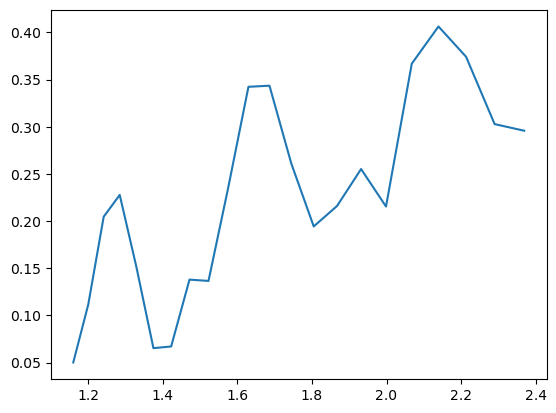

In [77]:
#printing out the wavelength and flux density



for i in range(0,len(wvlh)):
    print('The Wavelength (Microns) is {0:.3f} and the Flux Density (mJy) is {1:.3f}'.format(wvlh[i],flux_mjy[i]))
   # print('The Wavelength (Microns) is {0:.3f} and the Flux Density (mJy) is {1:.3f}'.format(a,b))

import matplotlib.pyplot as plt

plt.plot(wvlh,flux_mjy)
plt.show()

Later, we will show how to plot these kinds of data with _Matplotlib_



Complex example - the above example was a simple read of file entries, all of which were floating-point numbers.   Now let's try something tricker ...

Here's a mixed-format file of GKM stars within 50 parsecs, where we record the name, the spectral type, and lots of other information about the stars, including their x-ray activity levels.

Now, ``loadtxt`` allows us to specify additional things: e.g. which columns to use (usecols) and the data types (dtypes).  dtype can further be unpacked into 'names' and 'formats'.  Watch what happens

In [78]:

infile='gkm_50pc_plus_gaia_and_cahk'
table=np.loadtxt(subdir+infile,dtype=np.unicode_)
hgca_name=table[:,0].astype(str)
hgca_spectype=table[:,1].astype(str)
hgca_bmv=table[:,10].astype(float)
hgca_cahk=table[:,11].astype(float)
hgca_mass=table[:,2].astype(float)
hgca_ra=table[:,4].astype(float)
hgca_dec=table[:,5].astype(float)
plx=table[:,6].astype(float)


#now all the elements are properly read in

plx.dtype
hgca_dec.dtype

dtype('float64')

Here's another, more complex example for the spectrum of AB Aur b.  Here, we tell Python what all the data types are ahead of time.  Furthermore, we give each column a name so that we can more sleekly read in variables.

In [82]:
dtypes={'names':('wavelength','flux','error'),\
'formats':(np.float64,np.float64,np.float64)}

x=np.loadtxt(subdir+'spectrum_aloci_jan18.dat',usecols=range(3),dtype=dtypes)
#x=np.loadtxt(subdir+'spectrum_aloci_jan18.dat',dtype=dtypes) #this throws an error because there are more than 3 columns

wavelength=x['wavelength']
flux_a=x['flux']
error_a=x['error']

for a,b,c in zip(wavelength,flux_a,error_a):
    print('The Wavelength, Flux Density and Error is {0:.3f}, {1:.3f}, and {2:.3f}'.format(a,b,c))

The Wavelength, Flux Density and Error is 1.160, 1.254, and 0.231
The Wavelength, Flux Density and Error is 1.200, 1.349, and 0.200
The Wavelength, Flux Density and Error is 1.241, 1.334, and 0.251
The Wavelength, Flux Density and Error is 1.284, 1.368, and 0.250
The Wavelength, Flux Density and Error is 1.329, 1.340, and 0.304
The Wavelength, Flux Density and Error is 1.375, 0.938, and 0.220
The Wavelength, Flux Density and Error is 1.422, 1.310, and 0.257
The Wavelength, Flux Density and Error is 1.471, 1.305, and 0.295
The Wavelength, Flux Density and Error is 1.522, 1.309, and 0.268
The Wavelength, Flux Density and Error is 1.575, 1.494, and 0.217
The Wavelength, Flux Density and Error is 1.630, 1.480, and 0.256
The Wavelength, Flux Density and Error is 1.686, 1.549, and 0.300
The Wavelength, Flux Density and Error is 1.744, 1.762, and 0.274
The Wavelength, Flux Density and Error is 1.805, 1.718, and 0.290
The Wavelength, Flux Density and Error is 1.867, 1.560, and 0.256
The Wavele

#### _np.savetxt_

Saving files follows the same format:

``np.savetxt(filename,(columns of data),other keywords)`` EXCEPT THAT ``savetxt`` does this wonky thing where it saves arrays as _rows_, not columns if you aren't careful.   There are a couple of work-arounds for this:
* One is to do some transposing with the ``column_stack`` function that we will hear about later.
* Another is to do some type conversion magic with ``list`` and ``zip``.



Finally, we can include formatted print output statements.  Note the style: it resembles the old-style formatted print statements (also if you are used to IDL, some of this looks familiar: it's not too different in that language).

In [83]:
a=np.loadtxt(subdir+'spectrum_oct17_adi.dat')
wvlh=a[:,0]
flux=a[:,1]
eflux=a[:,2]
np.savetxt(subdir+'testme2.txt',np.column_stack((wvlh,flux,eflux)),fmt="%.3f" " " "%.2f" " " "%.2f")

In [86]:
a=np.loadtxt(subdir+'spectrum_oct17_adi.dat')
wvlh=a[:,0]
flux=a[:,1]
eflux=a[:,2]
np.savetxt(subdir+'testme3.txt',list(zip(wvlh,flux,eflux)),fmt="%.3f" " " "%.2f" " " "%.2f")

We can also add column headers ...

In [ ]:
a=np.loadtxt(subdir+'spectrum_oct17_adi.dat')
wvlh=a[:,0]
flux=a[:,1]
eflux=a[:,2]

colheaders="Wavelength, Flux Density (mJy), sigma(Flux Density, mJy)"
np.savetxt(subdir+'testme4.txt',list(zip(wvlh,flux,eflux)),fmt="%.3f" " " "%.2f" " " "%.2f",header=colheaders)
#note: put header *after* the data

... and control the delimiters ...

In [96]:
a=np.loadtxt(subdir+'spectrum_oct17_adi.dat')
wvlh=a[:,0]
flux=a[:,1]
eflux=a[:,2]

colheaders="Wavelength, Flux Density (mJy), sigma(Flux Density, mJy)"

#note: apparently the fmt statement will override delimiter.  
np.savetxt(subdir+'testme5.txt',list(zip(wvlh,flux,eflux)),fmt="%.3f" "," "%.2f" "," "%.2f",header=colheaders,delimiter=",")
#this one is ugly but you get the idea
np.savetxt(subdir+'testme5b.txt',list(zip(wvlh,flux,eflux)),header=colheaders,delimiter="|")

Much later we will also hear about an alternate write function within the AstroPy package that is, in my opinion, much better.